<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Lecture 2 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 13 January 2020, with material from Peter Norvig and Chris Fonnesbeck</div>

## Introduction to the NumPy library

`NumPy` is our performance and math library. It's a C-module, so it gets compiled to machine code and is blazing fast. It;s the **engine** that makes the Python snail fast!

<br />
<center>
    <img src="images/RocketSnail.png" width=400 />
</center>

Let's quickly review some Python data structures.

### Review: Python Sets

In [65]:
s = set()
s.add(1)
s.add(2)
s.add(1)
s

{1, 2}

In [7]:
!pwd

/Users/CYH/Desktop/DataScienceWithMachineLearning/Lecture2-Day3


In [3]:
file = open("data/http_log.txt", "r")
lines = file.readlines()
file.close()
ip_addresses = set(map(lambda x: x.split('-')[0], lines))
ip_addresses

{'115.186.128.19 ',
 '116.71.40.245 ',
 '116.71.43.234 ',
 '116.71.47.122 ',
 '116.71.50.81 ',
 '121.241.66.129 ',
 '122.50.137.176 ',
 '124.247.222.206 ',
 '125.16.5.109 ',
 '127.0.0.1 ',
 '129.83.31.1 ',
 '129.83.31.2 ',
 '158.73.247.16 ',
 '159.140.254.10 ',
 '192.107.147.2 ',
 '192.168.2.12 ',
 '192.168.2.13 ',
 '192.35.79.70 ',
 '194.8.75.212 ',
 '195.242.98.161 ',
 '198.169.188.225 ',
 '198.169.189.226 ',
 '198.64.129.244 ',
 '202.59.80.153 ',
 '203.129.204.131 ',
 '203.129.204.49 ',
 '203.129.231.99 ',
 '203.145.185.162 ',
 '203.200.213.98 ',
 '204.97.75.234 ',
 '206.145.28.20 ',
 '207.68.114.15 ',
 '207.77.135.68 ',
 '208.80.194.122 ',
 '208.80.194.37 ',
 '208.80.194.44 ',
 '208.80.194.48 ',
 '208.80.194.56 ',
 '209.172.119.5 ',
 '209.19.15.94 ',
 '212.235.5.188 ',
 '216.204.33.226 ',
 '216.86.52.162 ',
 '217.7.222.223 ',
 '222.187.220.162 ',
 '222.187.221.201 ',
 '222.187.221.88 ',
 '24.61.156.42 ',
 '58.52.202.7 ',
 '59.103.11.163 ',
 '59.103.26.145 ',
 '59.93.51.231 ',
 '59.

Most important list manipulation functions are *map*, *reduce*, and *filter*

### Review: Python List Comprehensions

List comprehensions are transformations of lists

In [7]:
even_numbers = (x for x in range(100) if x % 2 == 0)

In [5]:
even_numbers = (x for x in range(100) if x % 2 == 0)
zeroes = [0 for _ in range(100)]
pairs = [(x,y) for x in range(100) for y in range(100)]


In [73]:
values = [1,2,3,4,5,6,7,8,9]
even = list(filter(lambda x: x % 2 ==0, values))
even

[2, 4, 6, 8]

In [75]:
from functools import reduce
summed = reduce(lambda a,b: a + b, values)
summed

45

In [76]:
add_10 = [x + 10 for x in values]
add_10

[11, 12, 13, 14, 15, 16, 17, 18, 19]

### Review: Enumerations and Generators

In [8]:
# generator
def my_lazy_range(n):
    i = 0
    while i < n:
        yield i
        i += 1
        
for i in my_lazy_range(10):
    print(i)
    
# enumeration
a = range(100)
print(a)

0
1
2
3
4
5
6
7
8
9


# Introduction to NumPy

Ok, let's officially introduce NumPy.

Numpy adds Python support for large multi-dimensional arrays and matrices, along with a library of high-level mathematical functions to operate on these arrays. Numpy is the first and lowest level data science extension for Python. It focuses on number calculations, reads in fixed datatypes, improves RAM efficiency, and teaches you to think in **Vectors**, **Matrices**, and **Tensors**.

## Array Attributes

First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [4]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [5]:
x1 = np.random.randint(10, size=6)  
x1

array([4, 3, 4, 4, 8, 4])

In [6]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [7]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [8]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [9]:
x1

array([4, 3, 4, 4, 8, 4])

In [10]:
x1[5]

4

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [11]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [12]:
x2[2, 3]

7

Values can also be modified using any of the above index notation:

x2[0, 0] = 12
x2

## One-dimensional subarrays

In [15]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [17]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [18]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [19]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

### Multi-dimensional subarrays (matrices, tensors)

Multi-dimensional slices work in the same way, with multiple slices separated by commas.
For example:

In [20]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [21]:
x2[:2, :3]  # two rows, three columns

array([[3, 5, 2],
       [7, 6, 8]])

In [22]:
x2[:3, ::2]  # all rows, every other column

array([[3, 2],
       [7, 8],
       [1, 7]])

## Reshaping of Arrays

Another ***amazingly*** useful type of operation is **reshaping of arrays**.

The most flexible way of doing this is with the ``reshape`` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [13]:
np.arange(1, 10).ndim

1

In [21]:
grid = np.arange(1, 10).reshape((3, 3, 1, 1))
print(grid) ### unfold

[[[[1]]

  [[2]]

  [[3]]]


 [[[4]]

  [[5]]

  [[6]]]


 [[[7]]

  [[8]]

  [[9]]]]


In [24]:
np.squeeze(grid) ### projection

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Note that for this to work, the size of the initial array must match the size of the reshaped array!
Where possible, the ``reshape`` method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix.
This can be done with the ``reshape`` method, or more easily done by making use of the ``newaxis`` keyword within a slice operation:

In [15]:
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [27]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

## Array Concatenation and Splitting

All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays. We'll take a look at those operations here.

### Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

In [16]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

It can also be used for two-dimensional arrays:

In [29]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [30]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [31]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

### Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions ``np.split``, ``np.hsplit``, and ``np.vsplit``.  For each of these, we can pass a list of indices giving the split points:

In [17]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


## Plotting with matplotlib

Cannot do data science with ***plotting***!

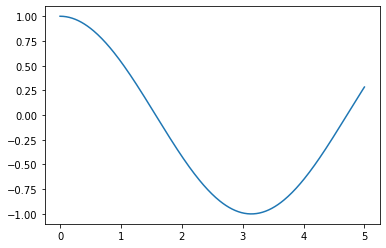

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0,5,300)
y = np.cos(x)
myplot = plt.plot(x,y)

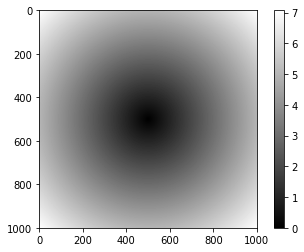

In [84]:
points = np.arange(-5,5,0.01)
x, y = np.meshgrid(points, points)
z = np.sqrt(x**2 + y**2)
plt.imshow(z, cmap = plt.cm.gray); plt.colorbar()

## Operation profiling

In [87]:
np.array('1,2,3,4')
np.array(np.mat('1,2; 3,4'))

array([[1, 2],
       [3, 4]])

In [90]:
myarr = np.arange(1000000)
mylist = range(1000000)
%time for _ in range(10): myarr = myarr * 2
%time for _ in range(10): [x * 2 for x in mylist]

Wall time: 68.7 ms
Wall time: 1.17 s


## Random arrays

*Sooooooo* useful!

In [95]:
myarray = np.array([[1,2,3], [4,5,6], [7,8,9]])
myarray

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [96]:
data = np.random.rand(4,4)
data

array([[0.97117502, 0.2702399 , 0.46897218, 0.7192935 ],
       [0.76293576, 0.81099541, 0.68167815, 0.70292056],
       [0.48838212, 0.13009147, 0.41570438, 0.07527911],
       [0.59066353, 0.80152767, 0.31922896, 0.17210402]])

## Boolean indexing:

In [20]:
names = np.array([1, 'foo'])
type(names[0])

numpy.str_

In [117]:
names = np.array(['bob', 'dino', 'ravi', "jane"])
print(names == 'bob')
data = np.random.rand(4,4)
data[names == 'bob']

[ True False False False]


array([[0.01740655, 0.77653323, 0.03861283, 0.17607691]])

In [121]:
arr = np.arange(32).reshape(8,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

## Beginner Linear Algebra

This is just a quick *appetizer*...

In [124]:
from numpy.linalg import inv, qr
X = np.random.randn(5,5)
X
Y = inv(X)
X @ Y

array([[ 1.00000000e+00,  2.19732529e-18,  2.00714118e-17,
         3.87294562e-17,  4.56224264e-17],
       [ 1.02876178e-15,  1.00000000e+00, -2.36666138e-16,
        -6.23462628e-17, -1.73085240e-16],
       [ 1.68234079e-16,  2.04138944e-17,  1.00000000e+00,
         7.56789468e-17, -2.68679153e-17],
       [ 9.68752523e-17, -3.15991425e-17, -8.46962739e-17,
         1.00000000e+00, -6.06259602e-16],
       [ 3.67993995e-16, -1.98617234e-17,  1.34540189e-17,
        -4.55055423e-17,  1.00000000e+00]])